In [1]:
import numpy as np 
import pandas as pd 
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.simplefilter(action='ignore', category=Warning)

/kaggle/input/mlx-2-0-regression/sample_submission.csv
/kaggle/input/mlx-2-0-regression/train.csv
/kaggle/input/mlx-2-0-regression/test.csv


# Loading the Data

In [2]:
df = pd.read_csv("/kaggle/input/mlx-2-0-regression/train.csv")
test = pd.read_csv("/kaggle/input/mlx-2-0-regression/test.csv")

In [3]:
df.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
0,76339,0.482850,1.169231,80.018,0.0201,Country Stuff (feat. Jake Owen),1.0,0.789,154586.0,NaN,...,4.0,161853.0,7.0,4.0,NaN,0.607,7.0,0.7250,0.000000,74
1,80006,0.267862,1.321321,147.966,0.3340,Solitude,6.0,0.715,46874.0,15.0,...,4.0,155619.0,1.0,4.0,0.843,0.783,4.0,NaN,0.043200,2
2,83501,0.242606,1.285319,142.980,0.1110,BDFFRNT (Saved from Conformity),4.0,NaN,264665.0,7.0,...,4.0,209378.0,6.0,4.0,NaN,0.211,10.0,0.6020,0.000000,35
3,81530,0.426400,1.279435,123.063,0.1960,Headlights (feat. Ilsey),5.0,0.685,209208.0,5.0,...,4.0,219043.0,11.0,4.0,0.702,0.369,NaN,0.8200,0.000335,70
4,60534,0.000000,0.974906,132.722,0.0811,Afraid,6.0,0.856,215346.0,5.0,...,4.0,258893.0,1.0,0.0,0.000,0.631,1.0,0.0221,0.000000,78


In [4]:
test.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0
0,25174,0.600480,1.543590,124.008,0.0729,Dr.Q,1.0,0.763,23032.0,4.0,...,0.834,4.0,253987.0,4.0,4.0,0.604,0.2050,0.0,0.720,0.165000
1,38453,NaN,0.722420,129.942,0.0105,Start A Party,11.0,0.801,215466.0,20.0,...,0.216,4.0,267626.0,5.0,4.0,0.881,0.2610,1.0,0.496,0.000000
2,29013,0.461916,0.757962,83.000,0.2700,Sombras - Live,2.0,0.561,252261.0,44.0,...,0.546,4.0,226626.0,0.0,4.0,0.555,0.0555,0.0,0.846,0.002760
3,57463,0.144236,0.923977,183.991,0.1210,Tennis Court,2.0,NaN,198907.0,23.0,...,0.337,4.0,234286.0,0.0,4.0,0.674,0.4040,7.0,0.428,0.000194
4,51264,0.629832,1.473795,201.277,0.0610,La Cumbia Del Lazo,10.0,0.716,158720.0,NaN,...,0.966,4.0,188520.0,8.0,4.0,0.511,0.9620,10.0,0.652,0.000115


# Preprocessing

## Dataset Overview

In [5]:
df.shape

(61609, 62)

In [6]:
df.describe()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,beat_frequency_0,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
count,61609.000000,59167.000000,61429.000000,61223.000000,61226.000000,58304.000000,55638.000000,6.032000e+04,52015.000000,51878.000000,...,59704.000000,5.250400e+04,53925.000000,58455.000000,56049.000000,60063.000000,57142.000000,60916.000000,60900.000000,61609.000000
mean,51390.780162,0.316976,1.238856,121.022910,0.274748,5.192594,0.604426,2.011315e+05,18.225723,119.133973,...,3.874849,2.110477e+05,5.212499,3.901274,0.612252,0.458851,5.288894,0.616045,0.148391,52.067328
std,29659.344472,0.212777,6.171617,30.467061,0.303020,3.629153,0.243943,1.100738e+05,14.404713,32.067971,...,0.564558,8.911099e+04,3.571288,0.465295,0.179591,0.261196,3.567118,0.230109,0.306915,21.569248
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.485000e+03,1.000000,0.000000,...,0.000000,4.120000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25832.000000,0.143877,0.730914,96.138000,0.027125,2.000000,0.447000,1.482340e+05,9.000000,94.802250,...,4.000000,1.682000e+05,2.000000,4.000000,0.506000,0.243000,2.000000,0.477000,0.000000,37.000000
50%,51410.000000,0.291060,1.004894,120.012000,0.141000,5.000000,0.633000,1.959215e+05,14.000000,119.893000,...,4.000000,2.029730e+05,5.000000,4.000000,0.630000,0.449000,5.000000,0.646000,0.000019,57.000000
75%,77069.000000,0.466860,1.358251,141.401000,0.454000,8.000000,0.803000,2.402488e+05,23.000000,140.023000,...,4.000000,2.413605e+05,8.000000,4.000000,0.745000,0.663000,8.000000,0.791000,0.024600,69.000000
max,102681.000000,0.976063,654.000000,239.983000,0.996000,11.000000,1.000000,3.664274e+06,199.000000,235.998000,...,5.000000,3.550973e+06,11.000000,5.000000,0.979000,1.000000,11.000000,1.000000,1.000000,100.000000


In [7]:
test.describe()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,beat_frequency_0,...,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0
count,41074.000000,39477.000000,40973.000000,40795.000000,40846.000000,38851.000000,37084.000000,4.024400e+04,34818.000000,34617.000000,...,37878.000000,39831.000000,3.487000e+04,36009.000000,38995.000000,37392.000000,40069.000000,38143.000000,40642.000000,40574.000000
mean,51266.332181,0.317621,1.361691,121.188746,0.273544,5.194744,0.603394,2.015330e+05,18.297145,119.093564,...,0.482031,3.873641,2.127539e+05,5.170041,3.904372,0.613224,0.458080,5.298849,0.616424,0.147817
std,29616.602490,0.212754,10.798167,30.748513,0.303162,3.634132,0.243186,1.214873e+05,14.392102,32.088262,...,0.250988,0.564785,1.166366e+05,3.555812,0.465687,0.178521,0.260893,3.572586,0.229218,0.306494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.391000e+03,1.000000,0.000000,...,0.000000,0.000000,4.120000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25441.500000,0.144666,0.730178,96.228500,0.027400,2.000000,0.449000,1.482500e+05,9.000000,94.646000,...,0.288000,4.000000,1.682965e+05,2.000000,4.000000,0.506000,0.242000,2.000000,0.479000,0.000000
50%,51244.000000,0.291669,1.005917,120.022000,0.139000,5.000000,0.633000,1.950930e+05,14.000000,119.659000,...,0.478000,4.000000,2.031730e+05,5.000000,4.000000,0.632000,0.446000,5.000000,0.648000,0.000019
75%,76910.000000,0.467372,1.356303,141.964500,0.449000,8.000000,0.800000,2.400000e+05,23.000000,140.037000,...,0.676000,4.000000,2.417662e+05,8.000000,4.000000,0.746000,0.664000,8.000000,0.790000,0.025700
max,102682.000000,0.952567,1000.000000,248.500000,0.996000,11.000000,1.000000,4.449616e+06,238.000000,239.713000,...,1.000000,5.000000,7.054236e+06,11.000000,5.000000,0.978000,0.998000,11.000000,1.000000,1.000000


In [8]:
desc = pd.DataFrame({
    'feature': df.columns,
    'type': df.dtypes.values,
    'count': df.count().values,
    'nunique': df.nunique().values,
    'null': df.isnull().sum().values
})

pd.set_option('display.max_rows', None)

print(desc)
desc.to_excel("column_info.xlsx", index=False)

                       feature     type  count  nunique   null
0                           id    int64  61609    61609      0
1           emotional_charge_2  float64  59167    22602   2442
2          groove_efficiency_1  float64  61429    23496    180
3             beat_frequency_1  float64  61223    18500    386
4            organic_texture_2  float64  61226     3734    383
5          composition_label_0   object  58660    21709   2949
6             harmonic_scale_1  float64  58304       12   3305
7            intensity_index_0  float64  55638     1569   5971
8                duration_ms_0  float64  60320    20082   1289
9            album_name_length  float64  52015      136   9594
10            beat_frequency_0  float64  51878    17047   9731
11            beat_frequency_2  float64  59843    18229   1766
12                artist_count  float64  58348       15   3261
13         composition_label_1   object  60149    22930   1460
14       publication_timestamp   object  60101     6061

In [9]:
desc_test = pd.DataFrame({
    'feature': test.columns,
    'type': test.dtypes.values,
    'count': test.count().values,
    'nunique': test.nunique().values,
    'null': test.isnull().sum().values
})

pd.set_option('display.max_rows', None)

print(desc_test)
desc_test.to_excel("column_info_test.xlsx", index=False)

                       feature     type  count  nunique  null
0                           id    int64  41074    41074     0
1           emotional_charge_2  float64  39477    16778  1597
2          groove_efficiency_1  float64  40973    17360   101
3             beat_frequency_1  float64  40795    14358   279
4            organic_texture_2  float64  40846     3439   228
5          composition_label_0   object  39156    15986  1918
6             harmonic_scale_1  float64  38851       12  2223
7            intensity_index_0  float64  37084     1457  3990
8                duration_ms_0  float64  40244    15244   830
9            album_name_length  float64  34818      131  6256
10            beat_frequency_0  float64  34617    13219  6457
11            beat_frequency_2  float64  39849    14112  1225
12                artist_count  float64  38809       12  2265
13         composition_label_1   object  40075    16824   999
14       publication_timestamp   object  40047     5222  1027
15      

## Duplicates

In [10]:
duplicates = df[df.duplicated()]
duplicates

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target


In [11]:
duplicates_test = test[test.duplicated()]
duplicates_test

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0


## Missing Values

In [12]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df[missing_df['Missing Values'] > 0])

                            Missing Values  Percentage
emotional_charge_2                    2442    3.963707
groove_efficiency_1                    180    0.292165
beat_frequency_1                       386    0.626532
organic_texture_2                      383    0.621662
composition_label_0                   2949    4.786638
harmonic_scale_1                      3305    5.364476
intensity_index_0                     5971    9.691766
duration_ms_0                         1289    2.092227
album_name_length                     9594   15.572400
beat_frequency_0                      9731   15.794770
beat_frequency_2                      1766    2.866464
artist_count                          3261    5.293058
composition_label_1                   1460    2.369784
publication_timestamp                 1508    2.447694
weekday_of_release                    5058    8.209839
album_component_count                 4363    7.081758
emotional_charge_1                    4014    6.515282
emotional_

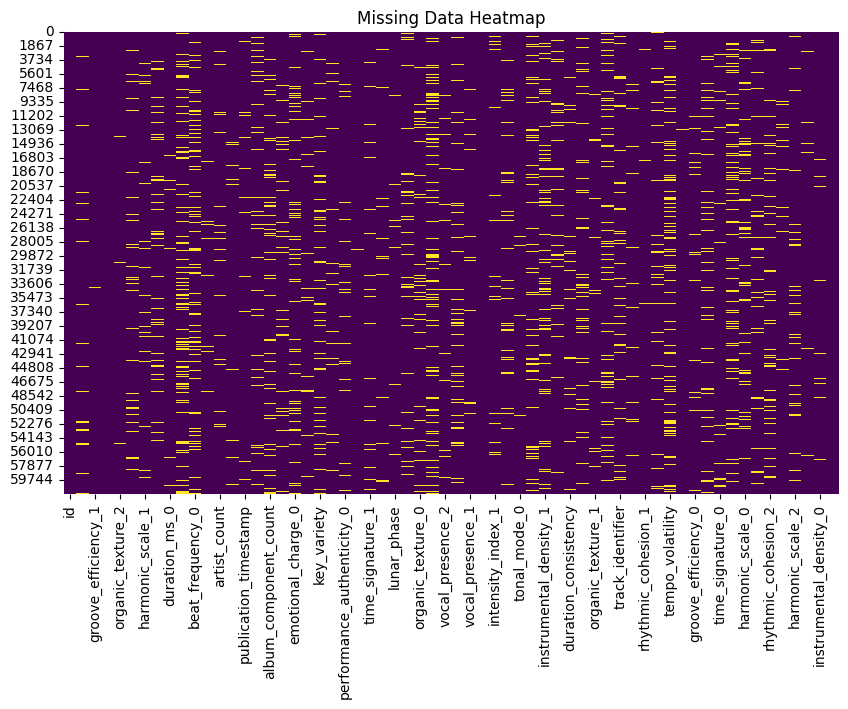

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [14]:
missing_values_test = test.isnull().sum()
missing_percentage_test = (missing_values_test / len(df)) * 100

missing_test = pd.DataFrame({'Missing Values': missing_values_test, 'Percentage': missing_percentage_test})
print(missing_test[missing_test['Missing Values'] > 0])

                            Missing Values  Percentage
emotional_charge_2                    1597    2.592154
groove_efficiency_1                    101    0.163937
beat_frequency_1                       279    0.452856
organic_texture_2                      228    0.370076
composition_label_0                   1918    3.113182
harmonic_scale_1                      2223    3.608239
intensity_index_0                     3990    6.476327
duration_ms_0                          830    1.347206
album_name_length                     6256   10.154361
beat_frequency_0                      6457   10.480612
beat_frequency_2                      1225    1.988346
artist_count                          2265    3.676411
composition_label_1                    999    1.621516
publication_timestamp                 1027    1.666964
weekday_of_release                    3392    5.505689
album_component_count                 2878    4.671395
emotional_charge_1                    2643    4.289958
emotional_

## Handling Missing Values

In [15]:
numerical_cols = list(df.select_dtypes(include=["float64", "int64"]).columns)
categorical_cols = list(df.select_dtypes(include=["object"]).columns)
numerical_cols.remove("target")

In [16]:
# Replacing missing values with the mean for numerical columns and with the mode for the categorical columns

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

test[numerical_cols] = test[numerical_cols].fillna(df[numerical_cols].mean())
test[categorical_cols] = test[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [17]:
df.isnull().sum()

id                            0
emotional_charge_2            0
groove_efficiency_1           0
beat_frequency_1              0
organic_texture_2             0
composition_label_0           0
harmonic_scale_1              0
intensity_index_0             0
duration_ms_0                 0
album_name_length             0
beat_frequency_0              0
beat_frequency_2              0
artist_count                  0
composition_label_1           0
publication_timestamp         0
weekday_of_release            0
album_component_count         0
emotional_charge_1            0
emotional_charge_0            0
tonal_mode_2                  0
key_variety                   0
performance_authenticity_2    0
performance_authenticity_0    0
season_of_release             0
time_signature_1              0
duration_ms_2                 0
lunar_phase                   0
instrumental_density_2        0
organic_texture_0             0
creator_collective            0
vocal_presence_2              0
tonal_mo

In [18]:
df.shape

(61609, 62)

## Invalid entries / Similar values

In [19]:
new_df = pd.concat([df, test], axis =0) 

In [20]:
new_df.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
0,76339,0.482850,1.169231,80.018,0.0201,Country Stuff (feat. Jake Owen),1.0,0.789000,154586.0,18.225723,...,4.0,161853.0,7.0,4.0,0.612252,0.607,7.000000,0.725000,0.000000,74.0
1,80006,0.267862,1.321321,147.966,0.3340,Solitude,6.0,0.715000,46874.0,15.000000,...,4.0,155619.0,1.0,4.0,0.843000,0.783,4.000000,0.616045,0.043200,2.0
2,83501,0.242606,1.285319,142.980,0.1110,BDFFRNT (Saved from Conformity),4.0,0.604426,264665.0,7.000000,...,4.0,209378.0,6.0,4.0,0.612252,0.211,10.000000,0.602000,0.000000,35.0
3,81530,0.426400,1.279435,123.063,0.1960,Headlights (feat. Ilsey),5.0,0.685000,209208.0,5.000000,...,4.0,219043.0,11.0,4.0,0.702000,0.369,5.288894,0.820000,0.000335,70.0
4,60534,0.000000,0.974906,132.722,0.0811,Afraid,6.0,0.856000,215346.0,5.000000,...,4.0,258893.0,1.0,0.0,0.000000,0.631,1.000000,0.022100,0.000000,78.0


In [21]:
print(df['composition_label_0'].nunique())
print(df['composition_label_1'].nunique())
print(df['creator_collective'].nunique())
print(df['composition_label_2'].nunique())
print(df['track_identifier'].nunique())

21709
22930
15139
22169
22991


It is practically impossible to check whether there are invalid or similar entries in 'composition_label_0', 'composition_label_1', 'creator_collective', 'composition_label_2', and'track_identifier'

In [22]:
new_df['weekday_of_release'].unique()

array(['Friday', 'Monday', 'Sunday', 'Wednesday', 'Tuesday', 'Thursday',
       'Saturday'], dtype=object)

In [23]:
new_df['season_of_release'].unique()

array(['summer', 'autumn', 'winter', 'spring'], dtype=object)

In [24]:
new_df['lunar_phase'].unique()

array(['waning', 'full', 'waxing', 'new'], dtype=object)

In [25]:
print("ts0:", new_df['time_signature_0'].value_counts(), "\n")
print("ts1:", new_df['time_signature_1'].value_counts(), "\n")
print("ts2:", new_df['time_signature_2'].value_counts())

ts0: time_signature_0
4.000000    85783
3.000000     8999
3.874849     3148
5.000000     2840
1.000000     1306
0.000000      607
Name: count, dtype: int64 

ts1: time_signature_1
4.000000    89393
3.000000     7356
3.912915     1863
5.000000     1778
3.912915     1251
1.000000      896
0.000000      146
Name: count, dtype: int64 

ts2: time_signature_2
4.000000    87109
3.000000     7355
3.901274     3154
3.901274     2079
5.000000     1775
1.000000      924
0.000000      287
Name: count, dtype: int64


* Two similar values for decimals may have occured due to rounding off.

* Usually, the time signatures are integer values. Therefore it is better to round them off to the nearest integer.

In [26]:
# new_df.loc[(new_df['time_signature_1'].between(3.91291467 - 1e-5, 3.91291467 + 1e-5)), 'time_signature_1'] = 3.91291467
new_df['time_signature_0'] = new_df['time_signature_0'].round()
new_df['time_signature_1'] = new_df['time_signature_1'].round()
new_df['time_signature_2'] = new_df['time_signature_2'].round()

print("ts0:", new_df['time_signature_0'].value_counts(), "\n")
print("ts1:", new_df['time_signature_1'].value_counts(), "\n")
print("ts2:", new_df['time_signature_2'].value_counts())

ts0: time_signature_0
4.0    88931
3.0     8999
5.0     2840
1.0     1306
0.0      607
Name: count, dtype: int64 

ts1: time_signature_1
4.0    92507
3.0     7356
5.0     1778
1.0      896
0.0      146
Name: count, dtype: int64 

ts2: time_signature_2
4.0    92342
3.0     7355
5.0     1775
1.0      924
0.0      287
Name: count, dtype: int64


In [27]:
new_df['time_signature_2'] = pd.to_numeric(new_df['time_signature_2'], errors='coerce')
new_df['time_signature_2'] = new_df['time_signature_2'].round()
print("ts2:", new_df['time_signature_2'].value_counts())

ts2: time_signature_2
4.0    92342
3.0     7355
5.0     1775
1.0      924
0.0      287
Name: count, dtype: int64


In [28]:
print("hs0:", new_df['harmonic_scale_0'].value_counts(), "\n")
print("hs1:", new_df['harmonic_scale_1'].value_counts(), "\n")
print("hs2:", new_df['harmonic_scale_2'].value_counts())

hs0: harmonic_scale_0
1.000000     10433
0.000000      9867
7.000000      9629
2.000000      9478
9.000000      8156
5.212499      7684
5.000000      7455
4.000000      6570
10.000000     6536
11.000000     6522
8.000000      6321
6.000000      6310
5.212499      5065
3.000000      2657
Name: count, dtype: int64 

hs1: harmonic_scale_1
1.000000     11836
0.000000     11191
2.000000     10091
7.000000      9694
9.000000      9440
11.000000     7943
5.000000      7548
8.000000      7387
4.000000      6842
10.000000     6337
6.000000      6083
5.192594      3305
3.000000      2763
5.192594      2223
Name: count, dtype: int64 

hs2: harmonic_scale_2
1.000000     11491
7.000000     10244
0.000000      9642
2.000000      9406
9.000000      9204
11.000000     7617
5.000000      7426
6.000000      7050
4.000000      6959
8.000000      6801
10.000000     6527
5.288894      4467
5.288894      2931
3.000000      2918
Name: count, dtype: int64


In [29]:
new_df['harmonic_scale_0'] = new_df['harmonic_scale_0'].round()
new_df['harmonic_scale_1'] = new_df['harmonic_scale_1'].round()
new_df['harmonic_scale_2'] = new_df['harmonic_scale_2'].round()

print("hs0:", new_df['harmonic_scale_0'].value_counts(), "\n")
print("hs1:", new_df['harmonic_scale_1'].value_counts(), "\n")
print("hs2:", new_df['harmonic_scale_2'].value_counts())

hs0: harmonic_scale_0
5.0     20204
1.0     10433
0.0      9867
7.0      9629
2.0      9478
9.0      8156
4.0      6570
10.0     6536
11.0     6522
8.0      6321
6.0      6310
3.0      2657
Name: count, dtype: int64 

hs1: harmonic_scale_1
5.0     13076
1.0     11836
0.0     11191
2.0     10091
7.0      9694
9.0      9440
11.0     7943
8.0      7387
4.0      6842
10.0     6337
6.0      6083
3.0      2763
Name: count, dtype: int64 

hs2: harmonic_scale_2
5.0     14824
1.0     11491
7.0     10244
0.0      9642
2.0      9406
9.0      9204
11.0     7617
6.0      7050
4.0      6959
8.0      6801
10.0     6527
3.0      2918
Name: count, dtype: int64


In [30]:
print("tm0:", new_df['tonal_mode_0'].value_counts(), "\n")
print("tm1:", new_df['tonal_mode_1'].value_counts(), "\n")
print("tm2:", new_df['tonal_mode_2'].value_counts())

tm0: tonal_mode_0
1.000000    63598
0.000000    38636
0.622375      281
0.622375      168
Name: count, dtype: int64 

tm1: tonal_mode_1
1.00000    60056
0.00000    35196
0.63299     4398
0.63299     3033
Name: count, dtype: int64 

tm2: tonal_mode_2
1.000000    62140
0.000000    37627
0.622625     2916
Name: count, dtype: int64


In [31]:
new_df['tonal_mode_0'] = new_df['tonal_mode_0'].round()
new_df['tonal_mode_1'] = new_df['tonal_mode_1'].round()
new_df['tonal_mode_2'] = new_df['tonal_mode_2'].round()

print("tm0:", new_df['tonal_mode_0'].value_counts(), "\n")
print("tm1:", new_df['tonal_mode_1'].value_counts(), "\n")
print("tm2:", new_df['tonal_mode_2'].value_counts())

tm0: tonal_mode_0
1.0    64047
0.0    38636
Name: count, dtype: int64 

tm1: tonal_mode_1
1.0    67487
0.0    35196
Name: count, dtype: int64 

tm2: tonal_mode_2
1.0    65056
0.0    37627
Name: count, dtype: int64


In [32]:
new_df['key_variety'].value_counts()

key_variety
3.000000    63177
2.000000    28509
2.649527     5405
2.649527     3549
1.000000     2043
Name: count, dtype: int64

In [33]:
new_df['key_variety'] = new_df['key_variety'].round()
new_df['key_variety'].value_counts()

key_variety
3.0    72131
2.0    28509
1.0     2043
Name: count, dtype: int64

# Feature Engineering

In [34]:
new_df['publication_timestamp'] = pd.to_datetime(new_df['publication_timestamp'])

In [35]:
new_df['year'] = new_df['publication_timestamp'].dt.year
new_df['month'] = new_df['publication_timestamp'].dt.month
new_df['day'] = new_df['publication_timestamp'].dt.day

In [36]:
# Create new features for the correlated features
# new_df["emotional_resonance_charge_2_combined"] = new_df["emotional_resonance_2"] / (new_df["emotional_charge_2"]+ 1e-6) 
# new_df["emotional_resonance_charge_1_combined"] = new_df["emotional_resonance_1"] / (new_df["emotional_charge_1"]+ 1e-6) 
# new_df["emotional_resonance_charge_0_combined"] = new_df["emotional_resonance_0"] / (new_df["emotional_charge_0"]+ 1e-6) 

Combining correlated features increased the rmse

# Encoding 

In [37]:
freq_encoding_features = [
    'composition_label_0', 'composition_label_1', 'creator_collective', 'composition_label_2',
    'track_identifier', 'creator_collective'
]

for feature in freq_encoding_features:
    freq = new_df[feature].value_counts()
    new_df[f'{feature}_encoded'] = new_df[feature].map(freq)

In [38]:
weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

new_df['weekday_of_release_num'] = new_df['weekday_of_release'].map(weekday_mapping)

In [39]:
# # Cyclical encoding for the weekday_of_release
# new_df['weekday_sin'] = np.sin(2 * np.pi * new_df['weekday_of_release_num'] / 7)
# new_df['weekday_cos'] = np.cos(2 * np.pi * new_df['weekday_of_release_num'] / 7)

In [40]:
season_mapping = {
    'spring': 0,
    'summer': 1,
    'autumn': 2,
    'winter': 3
}

new_df['season_of_release_num'] = new_df['season_of_release'].map(season_mapping)

In [41]:
# #Cyclical encoding
# new_df['season_sin'] = np.sin(2 * np.pi * new_df['season_of_release_num'] / 4)
# new_df['season_cos'] = np.cos(2 * np.pi * new_df['season_of_release_num'] / 4)

In [42]:
# Ordinal Encoding
lunar_mapping = {
    'new': 0,
    'waxing': 1,
    'full': 2,
    'waning': 3
}

new_df['lunar_phase_encoded'] = new_df['lunar_phase'].map(lunar_mapping)

In [43]:
new_df.drop([
    'composition_label_0', 'composition_label_1', 'composition_label_2', 'track_identifier', 
    'weekday_of_release', 'season_of_release', 'creator_collective', 'publication_timestamp',
    'lunar_phase'
], axis=1, inplace=True)

In [44]:
# new_df.drop([
#     'weekday_of_release_num', 'season_of_release_num'
# ], axis=1, inplace=True)

In [45]:
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', None)          # Do not wrap lines
pd.set_option('display.max_colwidth', None)   # Show full content inside each cell

new_df.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,beat_frequency_0,beat_frequency_2,artist_count,album_component_count,emotional_charge_1,emotional_charge_0,tonal_mode_2,key_variety,performance_authenticity_2,performance_authenticity_0,time_signature_1,duration_ms_2,instrumental_density_2,organic_texture_0,vocal_presence_2,tonal_mode_1,vocal_presence_1,vocal_presence_0,intensity_index_1,organic_immersion_0,tonal_mode_0,groove_efficiency_2,instrumental_density_1,organic_immersion_2,duration_consistency,organic_texture_1,rhythmic_cohesion_0,emotional_resonance_1,rhythmic_cohesion_1,performance_authenticity_1,tempo_volatility,organic_immersion_1,groove_efficiency_0,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target,year,month,day,composition_label_0_encoded,composition_label_1_encoded,creator_collective_encoded,composition_label_2_encoded,track_identifier_encoded,weekday_of_release_num,season_of_release_num,lunar_phase_encoded
0,76339,0.482850,1.169231,80.018,0.0201,1.0,0.789000,154586.0,18.225723,95.992000,162.045,2.10703,6.0,0.640680,0.478923,1.0,2.0,0.1120,0.336,4.0,189853.0,0.000000,0.09900,0.032200,1.0,0.0574,0.1420,0.629177,0.255067,1.0,1.450475,0.000000,0.063601,15204.423983,0.1140,0.685000,0.843,0.649,0.3170,82.02700,0.307521,1.150146,0.666,4.0,161853.0,7.0,4.0,0.612252,0.607,7.0,0.725000,0.000000,74.0,2021,6,4,37,40,34,7501,7546,4,1,3
1,80006,0.267862,1.321321,147.966,0.3340,6.0,0.715000,46874.0,15.000000,148.076000,125.964,2.00000,3.0,0.255200,0.559845,0.0,3.0,0.1720,0.752,4.0,123272.0,0.000083,0.00758,0.121905,0.0,0.7210,0.4760,0.880000,0.982007,1.0,0.879147,0.000000,0.686214,45592.954911,0.1310,0.523000,0.290,0.665,0.0825,22.11200,0.339768,2.718967,0.361,4.0,155619.0,1.0,4.0,0.843000,0.783,4.0,0.616045,0.043200,2.0,2019,7,1,1,2,1,1,1,0,1,3
2,83501,0.242606,1.285319,142.980,0.1110,4.0,0.604426,264665.0,7.000000,124.738000,134.403,2.00000,14.0,0.456576,0.148544,0.0,3.0,0.0828,0.189,4.0,302686.0,0.000000,0.44500,0.328000,0.0,0.4030,0.2890,0.928000,1.962932,0.0,0.912121,0.000000,0.559969,38309.603777,0.0179,0.578358,0.492,0.721,0.3970,18.24200,0.062464,1.270758,0.403,4.0,209378.0,6.0,4.0,0.612252,0.211,10.0,0.602000,0.000000,35.0,2014,11,18,3,2,2,7501,3,4,2,2
3,81530,0.426400,1.279435,123.063,0.1960,5.0,0.685000,209208.0,5.000000,119.133973,107.936,2.00000,15.0,0.518340,0.252765,0.0,3.0,0.1560,0.182,4.0,187126.0,0.000000,0.02450,0.063000,0.0,0.0581,0.0367,0.815000,0.085427,1.0,1.166430,0.000000,0.611278,13345.980827,0.0185,0.597000,0.636,0.636,0.1630,46.26782,0.067538,1.145485,0.520,4.0,219043.0,11.0,4.0,0.702000,0.369,5.0,0.820000,0.000335,70.0,2015,9,25,1,1,17776,1,1,4,2,2
4,60534,0.000000,0.974906,132.722,0.0811,6.0,0.856000,215346.0,5.000000,118.006000,0.000,2.00000,17.0,0.611499,0.540136,1.0,2.0,0.0000,0.697,4.0,6413.0,0.000000,0.11300,0.000000,1.0,0.0397,0.0430,0.777000,0.405568,0.0,1.450475,0.000358,0.008668,110199.561452,0.0261,0.760000,0.787,0.796,0.1210,132.72200,0.112618,1.124836,0.000,4.0,258893.0,1.0,0.0,0.000000,0.631,1.0,0.022100,0.000000,78.0,2006,1,1,40,37,36,36,37,4,3,1


In [46]:
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.max_colwidth')

In [47]:
df_copy = new_df.iloc[:61609].copy()
test_copy = new_df.iloc[61609:].copy()
test_copy = test_copy.drop(columns=['target'],  axis=1)

In [48]:
df_copy.shape

(61609, 64)

In [49]:
test_copy.shape

(41074, 63)

In [50]:
# encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
# test[categorical_cols] = encoder.transform(test[categorical_cols])

# Correlation analysis and feature selection

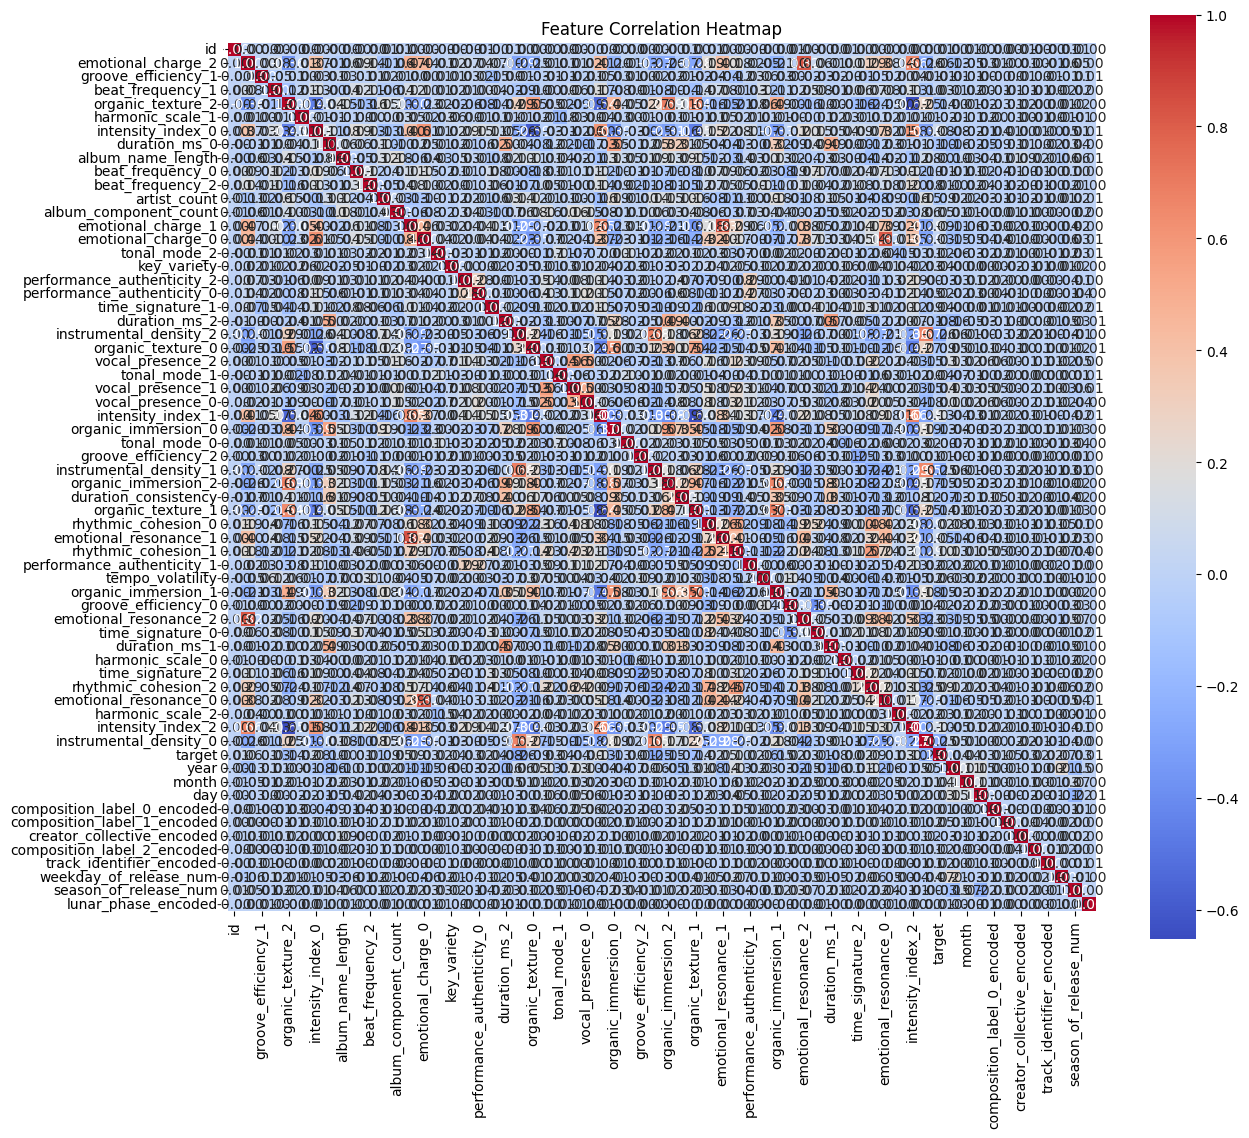

In [51]:
corr_matrix = df_copy.corr()

plt.figure(figsize=(14,12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title("Feature Correlation Heatmap")
plt.show()

In [52]:
corr_matrix.to_excel('correlation_table.xlsx')

high_corr = corr_matrix[((corr_matrix > 0.8) | (corr_matrix < -0.8)) & (corr_matrix != 1)]

high_corr.to_excel('high_correlation_table.xlsx')

Features which are correlated with more than 0.8
* emotional_resonance_2 vs emotional_charge_2 = 0.824245548429587
* emotional_charge_1 vs emotional_resonance_1 = 0.833016855757497
* emotional_charge_0 vs emotional_resonance_0 = 0.817576343961908

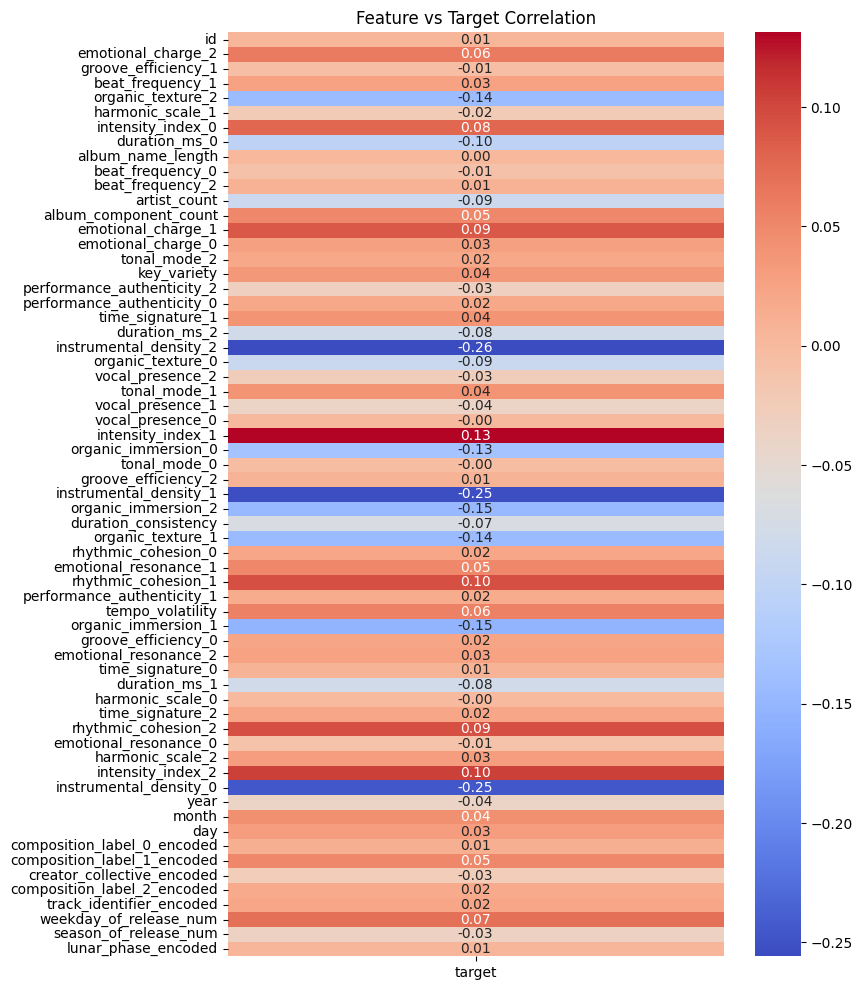

In [53]:
correlations = df_copy.corr()["target"].drop("target")  # Drop the self-correlation

plt.figure(figsize=(8, 12))
sns.heatmap(correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature vs Target Correlation")
plt.show()

correlations = correlations.sort_values(ascending=False)
correlations.to_excel("feature_target_correlations.xlsx")

# Dimentionality Reduction

In [54]:
# df_copy = df_copy.drop([
#     'emotional_charge_2', 
#     'emotional_charge_1',
#     'emotional_charge_0'
# ], axis=1)

# test_copy = test_copy.drop([
#     'emotional_charge_2', 
#     'emotional_charge_1',
#     'emotional_charge_0'
# ], axis=1)

Removing these features caused the RMSE to increase

In [55]:
df_copy.columns

Index(['id', 'emotional_charge_2', 'groove_efficiency_1', 'beat_frequency_1',
       'organic_texture_2', 'harmonic_scale_1', 'intensity_index_0',
       'duration_ms_0', 'album_name_length', 'beat_frequency_0',
       'beat_frequency_2', 'artist_count', 'album_component_count',
       'emotional_charge_1', 'emotional_charge_0', 'tonal_mode_2',
       'key_variety', 'performance_authenticity_2',
       'performance_authenticity_0', 'time_signature_1', 'duration_ms_2',
       'instrumental_density_2', 'organic_texture_0', 'vocal_presence_2',
       'tonal_mode_1', 'vocal_presence_1', 'vocal_presence_0',
       'intensity_index_1', 'organic_immersion_0', 'tonal_mode_0',
       'groove_efficiency_2', 'instrumental_density_1', 'organic_immersion_2',
       'duration_consistency', 'organic_texture_1', 'rhythmic_cohesion_0',
       'emotional_resonance_1', 'rhythmic_cohesion_1',
       'performance_authenticity_1', 'tempo_volatility', 'organic_immersion_1',
       'groove_efficiency_0', 'emo

In [56]:
# Removing features that are not very helpful to the model
df_copy = df_copy.drop([
    'groove_efficiency_1', 'beat_frequency_1', 'intensity_index_0', 'groove_efficiency_2',
    'composition_label_0_encoded', 'time_signature_2', 'tonal_mode_1', 'month',
    'harmonic_scale_0', 'tonal_mode_0', 'duration_ms_1', 'organic_texture_1'
], axis=1)
test_copy = test_copy.drop([
    'groove_efficiency_1', 'beat_frequency_1', 'intensity_index_0', 'groove_efficiency_2',
    'composition_label_0_encoded', 'time_signature_2', 'tonal_mode_1', 'month',
    'harmonic_scale_0', 'tonal_mode_0', 'duration_ms_1', 'organic_texture_1'
], axis=1)

In [57]:
# def drop_highly_correlated_features(df, threshold=0.8):
#     corr_matrix = df.corr().abs()

#     upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#     to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

#     df_reduced = df.drop(columns=to_drop)

#     return df_reduced, to_drop

In [58]:
# reduced_df, dropped_features = drop_highly_correlated_features(df_copy, threshold=0.8)

# print(f"Dropped features: {dropped_features}")
# print(f"New shape: {reduced_df.shape}")

# Splitting Data

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [60]:
X = df_copy.drop(columns=["target", "id"])
y = df_copy["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [61]:
# df_copy.describe()

In [62]:
# features_to_scale = [
#     'groove_efficiency_1', 'beat_frequency_1', 'duration_ms_0', 'album_name_length', 'beat_frequency_0',
#     'beat_frequency_2', 'album_component_count', 'duration_ms_2', 'organic_immersion_0',
#     'groove_efficiency_2', 'organic_immersion_2', 'duration_consistency', 'tempo_volatility',
#     'organic_immersion_1', 'groove_efficiency_0', 'duration_ms_1', 'composition_label_0_encoded',
#     'composition_label_2_encoded', 'track_identifier_encoded', 
#     'composition_label_1_encoded', 'creator_collective_encoded', 'year', 'month', 'day'	
# ]

# scaler = StandardScaler()

# X_train_scaled = X_train.copy()
# X_val_scaled = X_val.copy()
# X_test_scaled = test_copy.drop(columns=["id"]).copy()

# X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
# X_val_scaled[features_to_scale] = scaler.transform(X_val[features_to_scale])
# X_test_scaled[features_to_scale] = scaler.transform(X_test_scaled[features_to_scale])

In [63]:
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)   # Train on scaled training data
# y_pred = model.predict(X_val_scaled) # Predict on scaled validation data

# rmse = np.sqrt(mean_squared_error(y_val, y_pred))
# print("Root Mean Squared Error:", rmse)

In [64]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(test_copy.drop(columns=["id"]))

# Hyperprmeter Tuning and Cross-validation

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor  

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


# Evaluation

In [66]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

y_val_pred = grid_search.predict(X_val)

# RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("RMSE:", rmse)

# MAE 
mae = mean_absolute_error(y_val, y_val_pred)
print("MAE:", mae)

# R² 
r2 = r2_score(y_val, y_val_pred)
print("R^2 Score:", r2)

RMSE: 9.344551274383923
MAE: 5.414481476221392
R^2 Score: 0.8125146247611555


# Predictions on Test Set

In [67]:
final_model = RandomForestRegressor(
    max_depth=None,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

final_model.fit(X, y)  

RandomForestRegressor(n_estimators=200, random_state=42)

In [68]:
X_test = test_copy.drop(columns=["id"])

test_predictions = final_model.predict(X_test)
test["target"] = test_predictions
submission = test[["id", "target"]]

In [69]:
submission.head()

,id,target
0,25174,26.465
1,38453,67.155
2,29013,67.700
3,57463,76.890
4,51264,37.035


In [70]:
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv
